Case Study 2: Logistic Regression

Prepared by: Joshua Hudson

Note: The following resources were used throughout this notebook:
1. Unit 1-4 Code provided by Dr. Slater (Basis)
2. Async Code from Unit 1-4 (Basis)
2. Sklearn, Scipy, Matplotlib libraries (Syntax/common procedures/troubleshooting)
3. CoPilot (Syntax/common procedures/troubleshooting)


In [5]:
#load in the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
#load in the diabetes dataset
raw_data = pd.read_csv('diabetic_data.csv')
#raw_data.head()

#count the rows and columns in the dataset
num_rows = raw_data.shape[0]
num_cols = raw_data.shape[1]
#raw_data['readmitted'].value_counts()/num_rows * 100

#delete '?' entries and replace with NaN
raw_data.replace('?', np.nan, inplace=True)
#raw_data.head()

#count the number of missing entries in each column
raw_data.isna().sum()


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

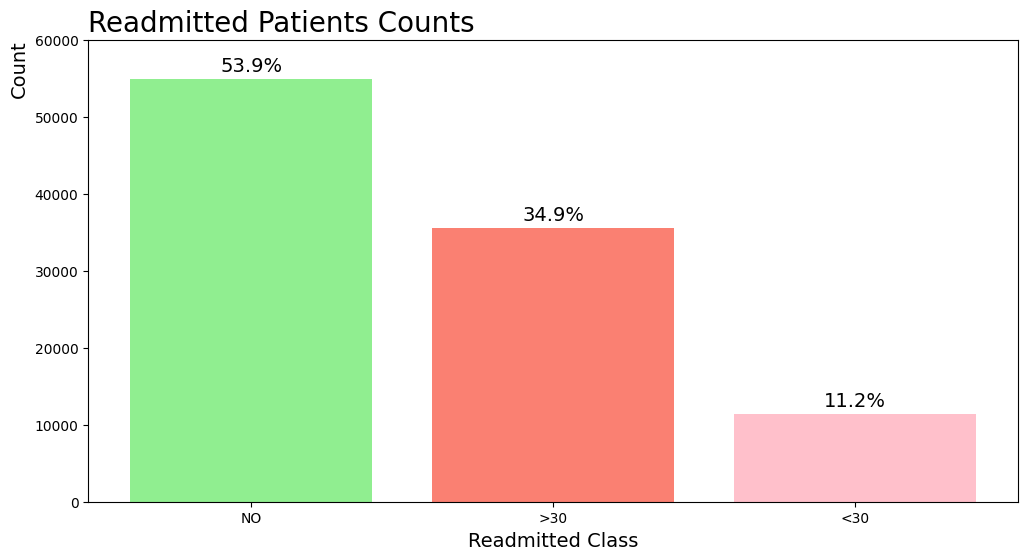

In [193]:
#plot the counts of the target variable 'readmitted' as a bar graph and show the %s for each class on top of the bars 
readmit_counts = raw_data['readmitted'].value_counts()#get the counts per class

#start the bar plot
plt.figure(figsize=(12,6))
plt.bar(readmit_counts.index, readmit_counts.values, color=['lightgreen', 'salmon', 'pink'])
plt.xlabel('Readmitted Class', fontsize=14)
plt.ylabel('Count', fontsize=14, loc = 'top')
plt.title('Readmitted Patients Counts', loc='left', fontsize=20)
for i, v in enumerate(readmit_counts.values):# this will print the %s of each class in the target variable!
    plt.text(i, v+3000, f"{v/num_rows*100:.1f}%",ha='center',va='top', fontsize=14)
plt.ylim(0,60001)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

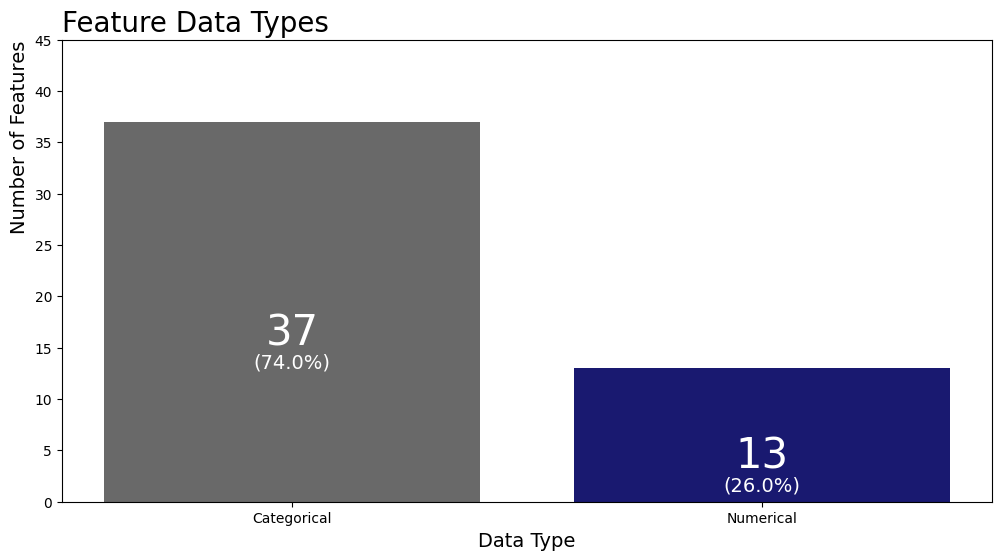

In [194]:
#make a bar plot of categorical features and continuous features
num_cat = raw_data.select_dtypes(include=['object', 'category']).shape[1]
num_cont = raw_data.select_dtypes(include=['number']).shape[1]

num_cat, num_cont

counts = [num_cat, num_cont]
labels = ['Categorical', 'Numerical']
plt.figure(figsize=(12,6))
plt.bar(labels, counts, color = ['dimgray', 'midnightblue'])
for i, v in enumerate(counts):# this will print the %s of each class in the feature set!
    plt.text(i, v/2, f"{v:.0f}",ha='center',va='top', fontsize=30, color = 'white')

for i, v in enumerate(counts):# this will print the %s of each class in the target variable!
    plt.text(i, v/2-4, f"({v/raw_data.shape[1]*100:.1f}%)",ha='center',va='top', fontsize=14, color = 'white')

plt.ylabel("Number of Features", fontsize=14, loc = 'top')
plt.ylim(0,45)
plt.xlabel("Data Type", fontsize=14)
plt.title("Feature Data Types", loc='left', fontsize = 20)
plt.show

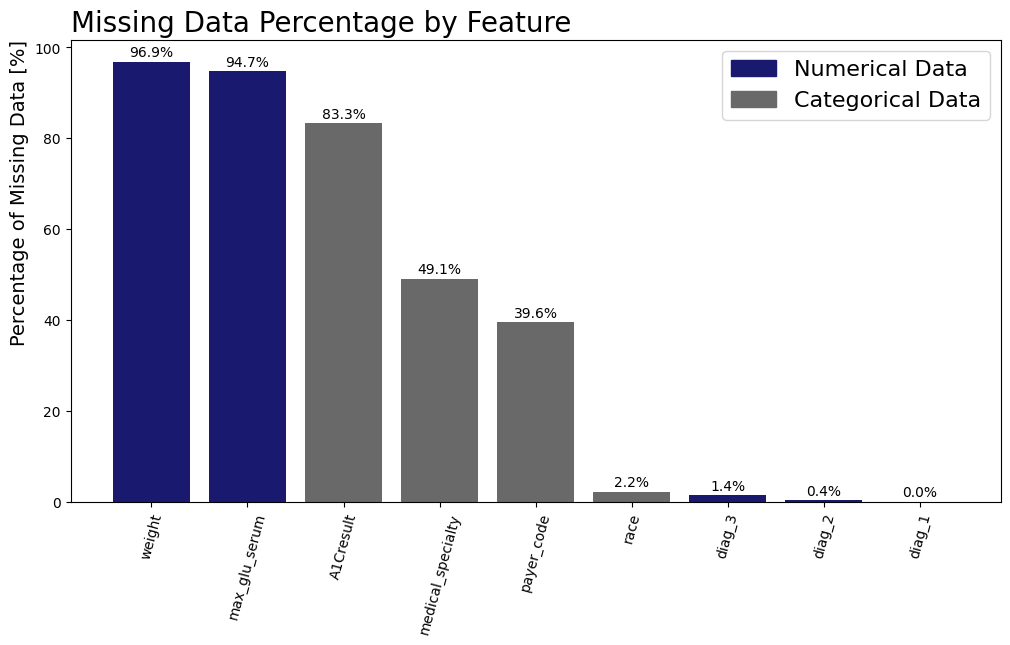

In [195]:
#pareto chart of missing data percentages
import matplotlib.patches as mpatches #use for making a legend

#firt calculate the percentage of missing data in each column
missing_percentage = (raw_data.isna().sum() / num_rows) * 100
num_cat = raw_data.select_dtypes(include=['object', 'category']).columns
num_cont = raw_data.select_dtypes(include=['number']).columns

#keep the color codes in this plot 
colors = ['dimgray' if col in num_cat else 'midnightblue'for col in raw_data.columns]

#make bar plot
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(missing_percentage.index, missing_percentage.values, color = colors)
for i, v in enumerate(missing_percentage.values):
    plt.text(i, v+3.5, f"{v:.1f}%",ha='center',va='top')
plt.xticks(rotation=75)
plt.ylabel('Percentage of Missing Data [%]', fontsize=14, loc='top')
plt.title('Missing Data Percentage by Feature',loc='left', fontsize=20)

#make a key to be standalone chart
key_cont = mpatches.Patch(color = 'dimgray', label = 'Categorical Data')
key_cat = mpatches.Patch(color = 'midnightblue', label = 'Numerical Data')
plt.legend(handles=[key_cat, key_cont], fontsize = 16)
plt.show()




In [323]:
#missing data handling v1 (Dropping ‘weight’, ‘max_glu_serum’, and 'A1Cresult’)
data_v1=raw_data.drop(columns = ['weight', 'max_glu_serum','A1Cresult'])
data_v1.head()

#missing data handling by concatenating ‘diag_1’, ‘diag_2’, and ‘diag_3’ and drop them after
data_v1['diag__1_2_3'] = data_v1['diag_1'].astype(str)+"_"+data_v1['diag_1'].astype(str)+"_"+data_v1['diag_1'].astype(str)
data_v2 = data_v1.drop(columns = ['diag_1', 'diag_2','diag_3'])

data_v2.isna().sum()


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [324]:
#reinitialize the category columns for future one hot encoding

from sklearn.preprocessing import LabelEncoder
data_coded = data_v2
encoded = {}

#encode the features
for i in data_coded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    data_coded_nonmissing = data_coded[i].dropna()
    le.fit(data_coded_nonmissing)#this is need to fit (or assign) numerical values to the only the non-missing data using the LabelEncoder function

    data_coded.loc[data_coded[i].notnull(),i]= le.fit_transform(data_coded.loc[data_coded[i].notnull(),i]).astype(int)
    encoded[i] = le

data_coded.isna().sum()


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [304]:
#now we need to drop the rows of data with missing values to use as a training dataset for fugure logistic regression imputation
data_nm = data_coded.dropna().astype(int)


In [254]:
#imputation to 'race', 'payer_code', and 'medical_specialty' using logistic regression
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

X_impute = data_nm.drop(columns = ['race','payer_code','medical_specialty'])

y1 = data_nm['race']
y2 = data_nm['payer_code']
y3 = data_nm['medical_specialty']


#begin setting up the multinomial logistic regression for imputation of values
#this procedure was shown to us in class
model = LogisticRegression(max_iter=10000, multi_class= 'multinomial', solver='lbfgs')
race_fit = model.fit(X_impute, y1)
payercode_fit = model.fit(X_impute, y2)
medspec_fit = model.fit(X_impute, y3)

c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-

In [ ]:
#now for imputation 'race'
data_mrace = data_coded[data_coded['race'].isnull()]
data_mrace = data_mrace.drop(columns = ['race','payer_code','medical_specialty'])
race_preds = race_fit.predict(data_mrace)
race_preds_le = le.inverse_transform(race_preds)
data_coded.loc[data_coded['race'].isnull(),'race'] = race_preds_le


#now for imputation on 'payer_code'
data_mpayercode = data_coded[data_coded['payer_code'].isnull()]
data_mpayercode = data_mpayercode.drop(columns = ['race','payer_code','medical_specialty'])
payercode_preds = payercode_fit.predict(data_mpayercode)
payercode_preds_le = le.inverse_transform(payercode_preds)
data_coded.loc[data_coded['payer_code'].isnull(),'payer_code'] = payercode_preds_le
data_coded.isna().sum()

#now for imputation on 'medical_specialty'
data_mmedspec = data_coded[data_coded['medical_specialty'].isnull()]
data_mmedspec = data_mmedspec.drop(columns = ['race','payer_code','medical_specialty'])
medspec_preds = medspec_fit.predict(data_mmedspec)
medspec_preds_le = le.inverse_transform(medspec_preds)
data_coded.loc[data_coded['medical_specialty'].isnull(),'medical_specialty'] = medspec_preds_le


#check for missing data in the orinal coded dataset
data_coded.isna().sum() #There are no longer any missing variables

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

In [435]:
#split dataset for logistic regression analysis on the 'readmitted' target variable
X = data_coded.drop(columns = ['readmitted']).astype(int)
y = data_coded['readmitted'].astype(int)

#logistic regression modeling
#this procedure was taken from lecture 3 follow along code
from sklearn.linear_model import LogisticRegressionCV
splits = KFold(n_splits=5, shuffle=True, random_state=44)
model = LogisticRegression()
search_params = {"C": np.logspace(-6,6,100)}

search = GridSearchCV(model, param_grid=search_params, scoring="accuracy",cv=splits)
search.fit(X, y)


c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stab

,estimator,LogisticRegression()
,param_grid,{'C': array([1.0000...00000000e+06])}
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


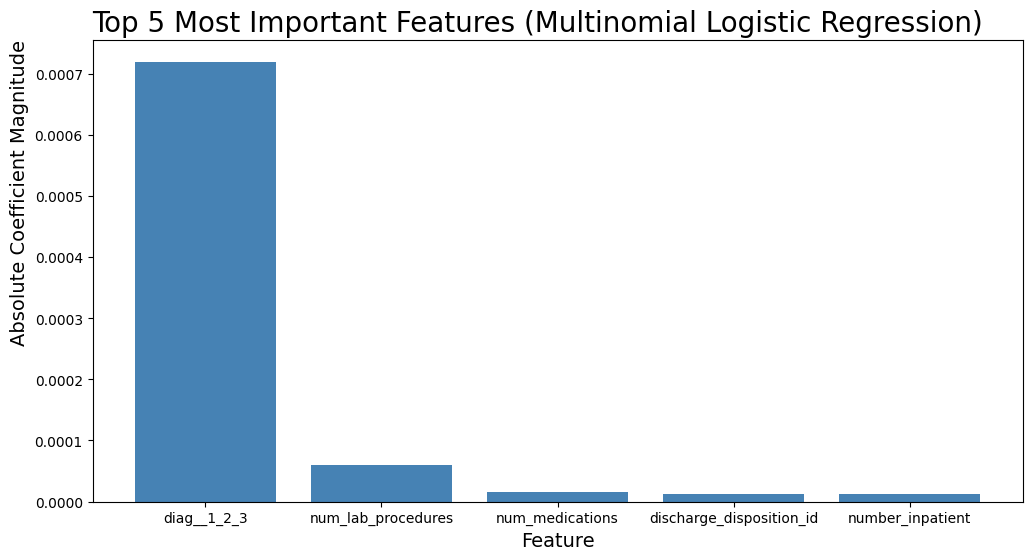

In [471]:
import numpy as np
import pandas as pd

#get the model coefficients from GridSearchCV
mod = search.best_estimator_
coef = mod.coef_
feature_names = X.columns

# Create a Series of absolute coefficients 
# i had copilot help here as i was getting stuck on a method to do this with my coeff structure
abs_importance = np.max(np.abs(coef), axis=0) #this takes the absolute magnitude of the coefficients to enable ranking

coef_df = pd.DataFrame({"Top 5 Feature": feature_names,"<30 Importance": coefs[0],">30 Importance": coefs[1],"NO": coefs[2],"abs_importance": abs_importance}) #This shows the importance of each feature for each predictor class

top5 = coef_df.sort_values("abs_importance", ascending=False).head(5)

#now plot the data
plt.figure(figsize=(12, 6))

plt.bar(top5["Top 5 Feature"], top5["abs_importance"], color="steelblue")
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Absolute Coefficient Magnitude", fontsize=14, loc='top')
plt.title("Top 5 Most Important Features (Multinomial Logistic Regression)",loc='left', fontsize=20)

plt.show()





In [465]:
top5

,Top 5 Feature,<30 Importance,>30 Importance,NO,abs_importance
43,diag__1_2_3,0.000005,1.522105e-05,7.200092e-04,0.000720
11,num_lab_procedures,-0.000002,-1.522042e-07,2.485496e-10,0.000059
13,num_medications,-0.000002,-1.041566e-07,2.380263e-09,0.000016
6,discharge_disposition_id,-0.000004,-4.334918e-07,-5.162101e-10,0.000012
16,number_inpatient,-0.000002,-6.823328e-09,4.340206e-09,0.000012


In [ ]:
#plot the coefficients of the logistic model in order of magnitude with the top ten bars green and the bottom ten bars lightgrey
plt.figure(figsize=(20,6))
plt.bar(importance.sort_values(ascending=False).index, importance.sort_values(ascending=False), color=['green' if i < 10 else 'lightgrey' for i in range(len(importance))])
plt.xticks(rotation=90)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Absolute Coefficient Value [K]", fontsize=20)
plt.title("Least Squares Regression: Feature Coefficients", fontsize=24, loc='left')
plt.show()

# Get the top 10
top5 = importance.sort_values(ascending=False).head(5)
print(top5)

array([[-2.18594590e-09, -1.88477209e-09, -3.11714536e-09,
        -8.20417617e-07, -9.55374872e-06, -4.41150463e-06,
         1.27757829e-06, -1.02364486e-05, -3.94727446e-06,
        -3.09185149e-09, -5.51023038e-11, -5.94671180e-05,
        -2.82050283e-06, -1.62311455e-05,  4.61157275e-07,
         1.50768705e-06,  5.43753475e-06, -7.80512072e-06,
        -2.36464770e-06, -1.72269666e-06, -1.75281063e-06,
        -1.75380025e-06, -1.88788157e-06, -1.15808689e-10,
        -1.98612889e-06, -1.99728175e-06, -2.53225231e-09,
        -1.89888687e-06, -1.93515792e-06, -1.75765352e-06,
        -1.75073457e-06, -7.09128865e-10, -3.11240019e-09,
         0.00000000e+00,  0.00000000e+00, -2.41628291e-06,
        -1.75772148e-06, -1.05695228e-09, -1.19608891e-10,
        -7.27527069e-11, -5.61309516e-11, -1.25369805e-06,
        -1.02562750e-06, -6.18732098e-04],
       [-3.82705851e-10,  3.92750428e-09,  4.65826011e-10,
        -4.64302050e-07,  1.65225626e-07, -5.13632929e-07,
        -1.23

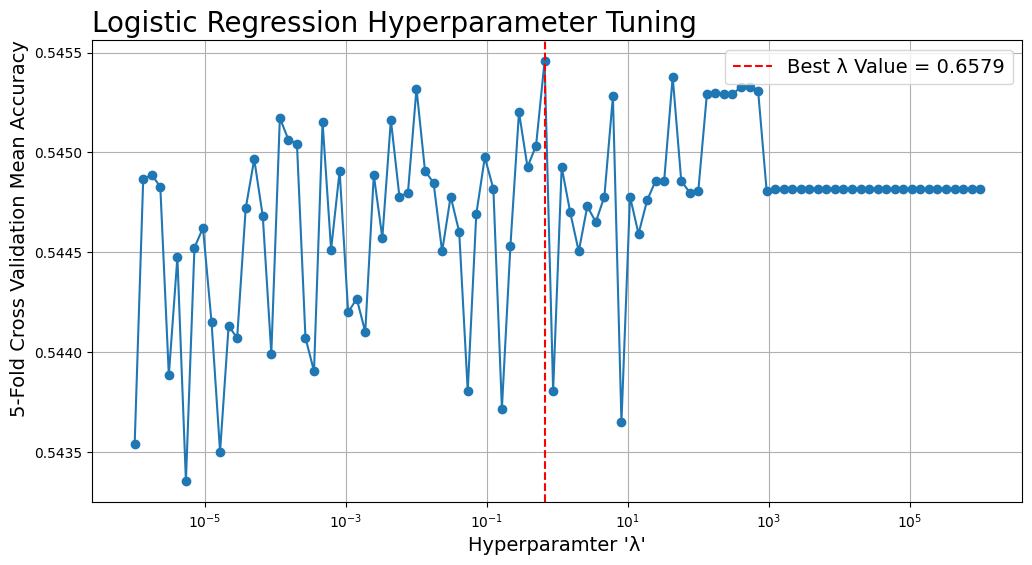

In [358]:
import matplotlib.pyplot as plt
import numpy as np

# Extract results
C_values = search.cv_results_["param_C"].data.astype(float)
mean_scores = search.cv_results_["mean_test_score"]

best_C = search.best_params_["C"]
best_score = search.best_score_

# Plot
plt.figure(figsize=(12,6))
plt.semilogx(C_values, mean_scores, marker='o')
plt.axvline(best_C, color='red', linestyle='--', label=f"Best λ Value = {best_C:.4g}")
plt.xlabel("Hyperparamter 'λ'", fontsize=14)
plt.ylabel("5-Fold Cross Validation Mean Accuracy", fontsize=14, loc='top')
plt.title("Logistic Regression Hyperparameter Tuning", fontsize=20, loc='left')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


In [344]:
#now make the model using the 'best' hyperparameter
model_best = LogisticRegression(C=best_C)
preds = cross_val_predict(model_best, X, y, cv=splits)
probs = cross_val_predict(model_best, X, y, cv=splits, method = 'predict_proba')

c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stab

Accuracy: 0.5454572253994457
Sensitivity (Recall)): 0.5321284299905698
Specificity: 0.5311168074105368


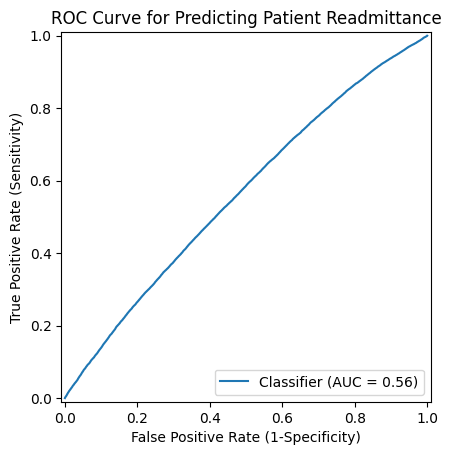

In [397]:
#This code provided during lecture 3 to the class and is the basis for classification metrics
import numpy as np
from sklearn.metrics import accuracy_score, class_likelihood_ratios, recall_score, confusion_matrix
accuracy = accuracy_score(y, preds)

from sklearn.metrics import RocCurveDisplay


roc = RocCurveDisplay.from_predictions(labels,probs[:,2]) #shows the roc curve and reports the area under the curve
show_ROC = roc.ax_
show_ROC.set_xlabel("False Positive Rate (1-Specificity)")
show_ROC.set_ylabel("True Positive Rate (Sensitivity)")
show_ROC.set_title("ROC Curve for Predicting Patient Readmittance")


print("Accuracy:", accuracy)
print("Sensitivity (Recall)):", roc.tpr.mean())
print("Specificity:", 1-roc.fpr.mean())



In [402]:
data_coded['readmitted'].head(50)

0     2
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    1
11    0
12    0
13    2
14    1
15    2
16    0
17    2
18    1
19    2
20    2
21    2
22    2
23    1
24    2
25    2
26    2
27    1
28    1
29    1
30    2
31    1
32    1
33    1
34    2
35    1
36    2
37    1
38    2
39    1
40    1
41    1
42    1
43    1
44    2
45    2
46    0
47    2
48    2
49    2
Name: readmitted, dtype: object

<Figure size 800x600 with 0 Axes>

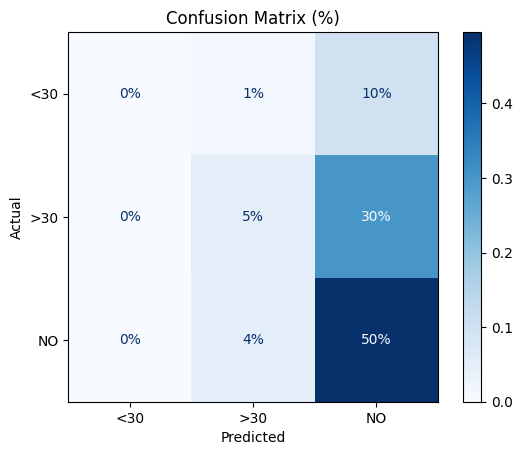

In [409]:
#I wanted to show a confusion matrix using percentages. I used Sklearn and copilot to help generate this code

labels = ["<30", ">30", "NO"]

cm = confusion_matrix(y,preds)
cm_percent = cm/cm.sum()
cm_percent
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=labels)

disp.plot(cmap="Blues", values_format=f"{v:.1f}%")
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
